# Examine Clusters

In [1]:
import os
from decouple import config
import second_level_functions as slf
import numpy as np
import pandas as pd
import ptitprince as pt
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

Change task and contrast to examine clusters

In [2]:
task = 'eft'
contrast = 'interaction'

Read in images and get parameter estimates

In [3]:
base_dir = config(task)
path = os.path.join(base_dir, '2ndlevel')
copes_dir = os.path.join(base_dir, '2ndlevel', 'mixed_model')
parameter_estimates_df = slf.get_peak_voxel(base_dir, path, copes_dir, contrast)

## Plot and get mean of parameter estimates

Split parameter estimates by group and time point. Then get mean of each group and at in each time point

In [5]:
group_values = {
                'an_t1': parameter_estimates_df.loc[(parameter_estimates_df['group'] == 'AN') 
                                                      & (parameter_estimates_df['time_point'] == 't1')].iloc[:, 4:],
                'an_t2':  parameter_estimates_df.loc[(parameter_estimates_df['group'] == 'AN') 
                                                     & (parameter_estimates_df['time_point'] == 't2')].iloc[:, 4:],
                'hc_t1': parameter_estimates_df.loc[(parameter_estimates_df['group'] == 'HC') 
                                                    & (parameter_estimates_df['time_point'] == 't1')].iloc[:, 4:],
                'hc_t2': parameter_estimates_df.loc[(parameter_estimates_df['group'] == 'HC') 
                                                    & (parameter_estimates_df['time_point'] == 't2')].iloc[:, 4:]
}

In [6]:
means_std_df = pd.DataFrame(data={
    'AN T1 mean':  group_values['an_t1'].mean(),
    'AN T1 std':  group_values['an_t1'].std(),
    'HC T1 mean': group_values['hc_t1'].mean(),
    'HC T1 std': group_values['hc_t1'].std(),
    'AN T2 mean': group_values['an_t2'].mean(),
    'AN T2 std':  group_values['an_t2'].std(),
    'HC T2 mean': group_values['hc_t2'].mean(),
    'HC T2 std': group_values['hc_t2'].std(),
    'AN overall mean': pd.concat((group_values['an_t1'], group_values['an_t2'])).mean(),
    'AN overall std': pd.concat((group_values['an_t1'], group_values['an_t2'])).std(),
    'HC overall mean': pd.concat((group_values['hc_t1'], group_values['hc_t2'])).mean(),
    'HC overall std': pd.concat((group_values['hc_t1'], group_values['hc_t2'])).std()
                   }).T
means_std_df

,0,1,2,3,4,5
AN T1 mean,3.164361,4.242870,1.868615,1.430196,5.701842,6.741921
AN T1 std,2.963295,5.291274,1.896685,1.021039,6.002200,6.937675
HC T1 mean,9.701787,13.826612,4.624110,2.742488,15.612160,17.317799
HC T1 std,14.884332,24.380634,5.393777,1.990463,20.673819,27.353666
AN T2 mean,7.554090,7.467186,2.797979,2.088970,13.617514,13.107894
AN T2 std,8.752158,10.988969,2.854433,1.781813,15.493722,14.074580
HC T2 mean,4.646283,5.083607,2.572464,1.520716,8.758195,8.423120
HC T2 std,5.575875,5.799491,3.242436,1.275471,7.461505,8.766540
AN overall mean,5.359226,5.855028,2.333297,1.759583,9.659678,9.924907
AN overall std,6.871284,8.741861,2.458593,1.483806,12.359479,11.505136


Plot parameter estimates

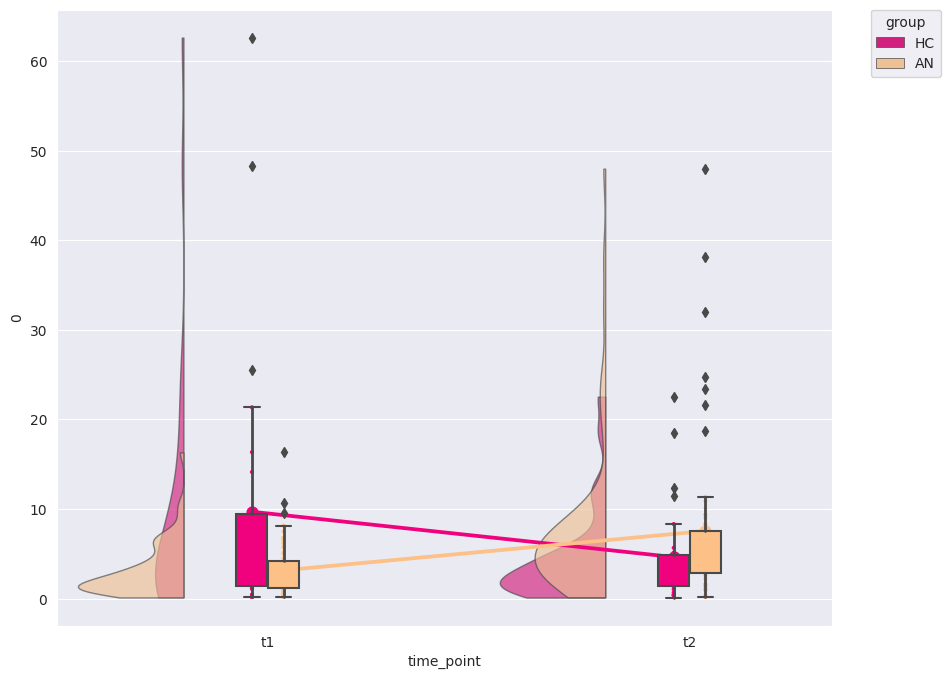

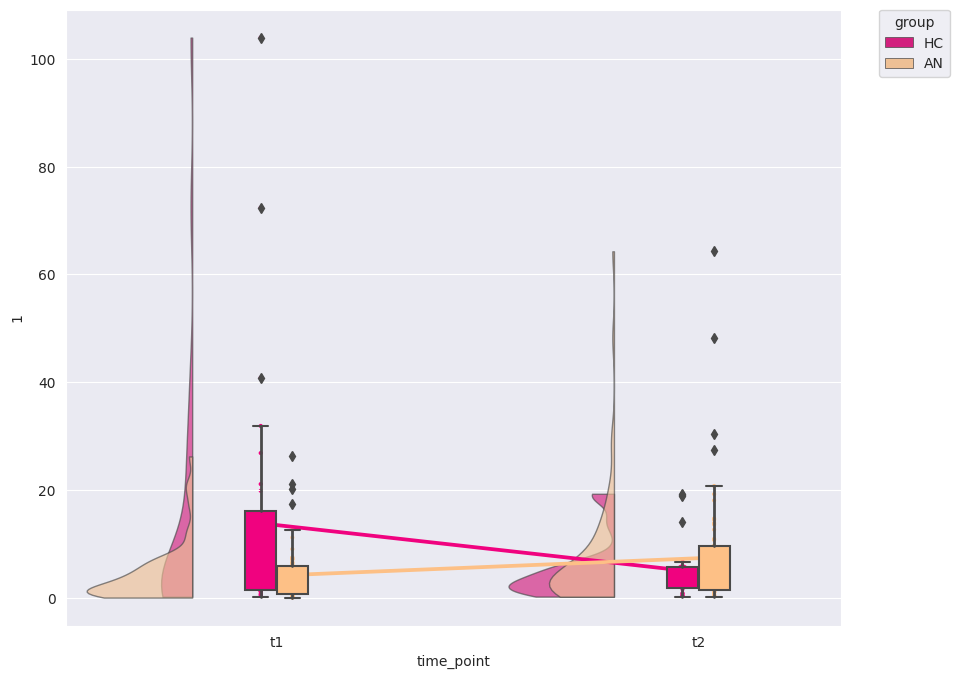

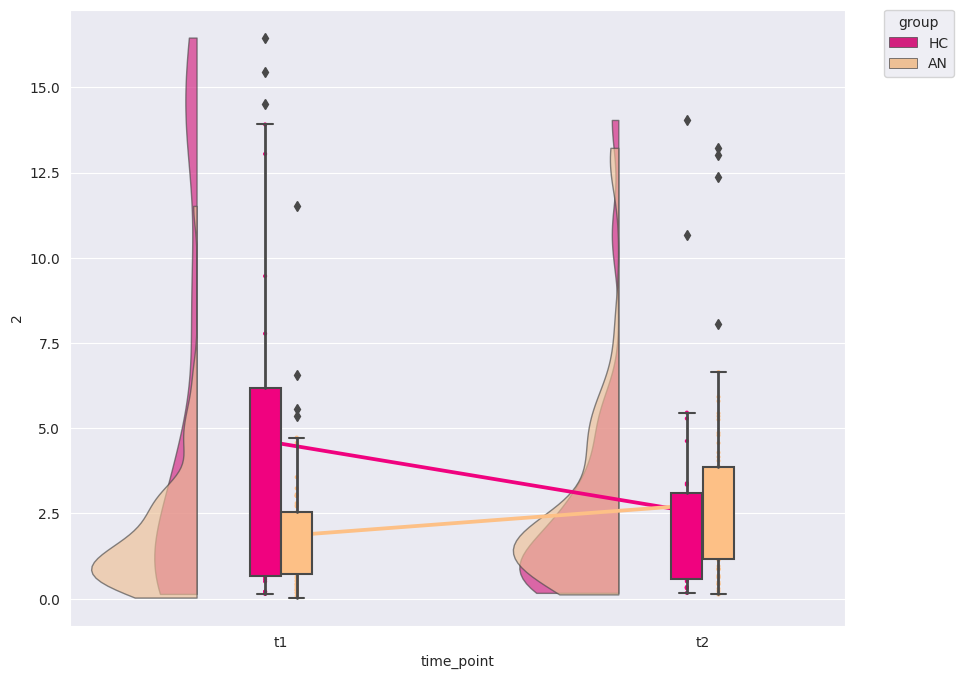

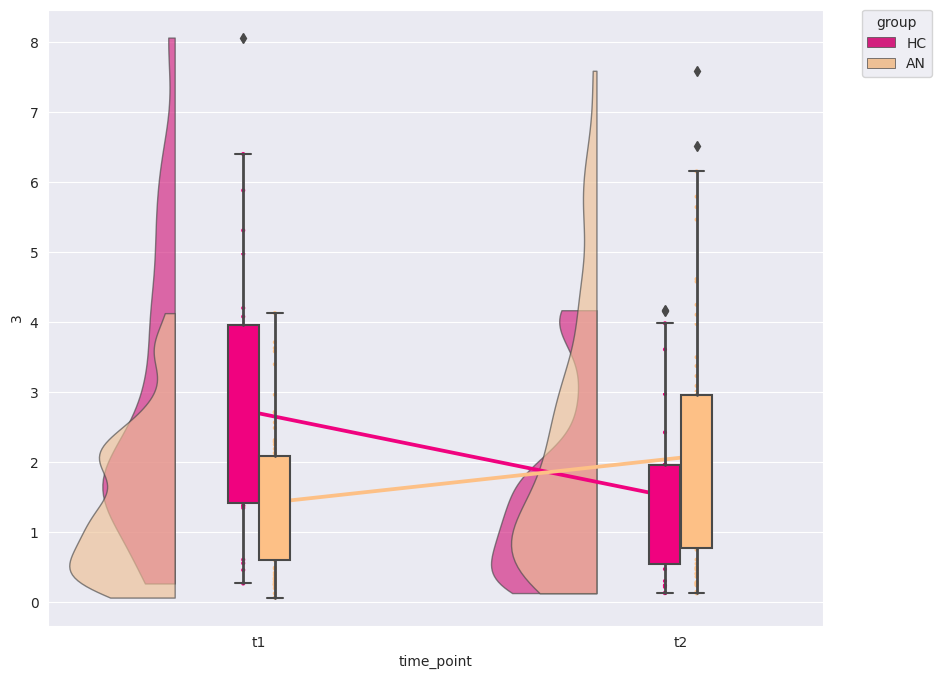

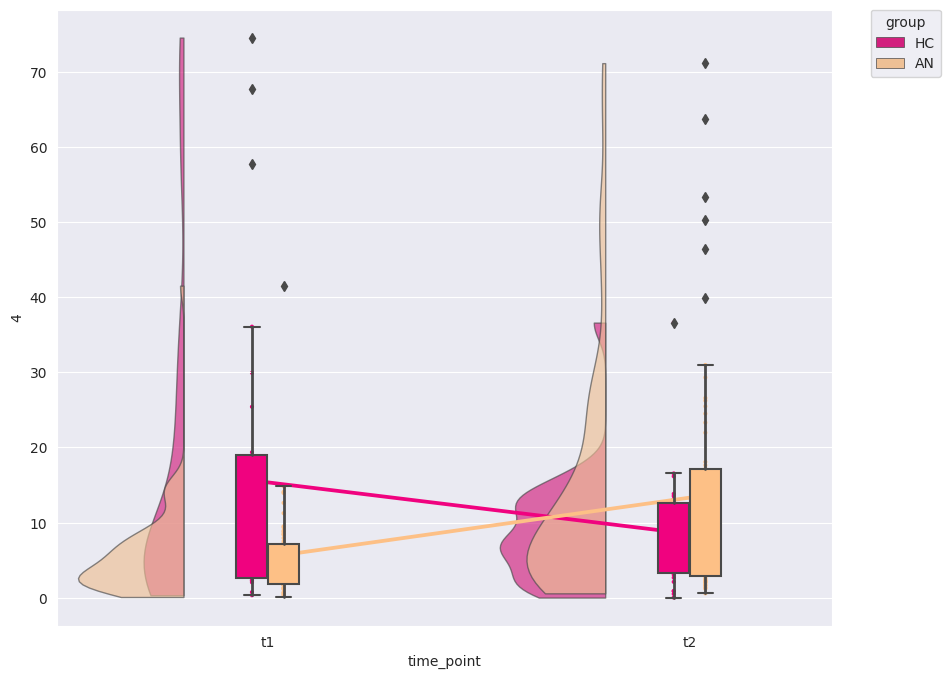

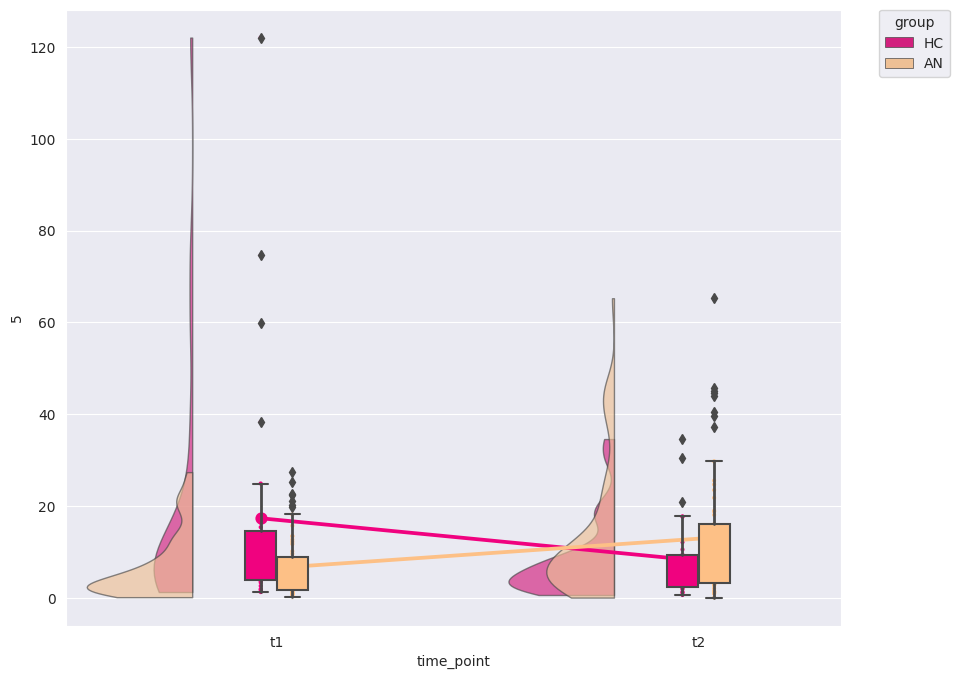

In [7]:
for cluster in means_std_df.columns:
    fig,ax = plt.subplots(1,1, figsize=(10, 8))
    pt.RainCloud(
        x="time_point", 
        y=cluster, 
        hue="group", 
        data=parameter_estimates_df, 
        palette='Accent_r', 
        alpha=.65, 
        dodge=True, 
        scale="area",
        ax=ax,
        width_viol=.5,
        jitter=0,
        pointplot = True,
        bw=.3
         )



## Linear Mixed Model

Change reference level of model by changing the name of AN to participant with AN (pAN) and HC to Control

In [8]:
regression_df = parameter_estimates_df
regression_df['group'] = regression_df['group'].apply(lambda group: 'pAN' if group == 'AN' else 'Control')

define and fit the model

In [9]:
model = smf.mixedlm("mean ~ time_point + group + group*time_point", 
                    regression_df, 
                    groups=regression_df["sub"]).fit()
model.summary()

PatsyError: Error evaluating factor: NameError: name 'mean' is not defined
    mean ~ time_point + group + group*time_point
    ^^^^